In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
walmart_sales = pd.read_csv('Walmart.csv')

In [130]:
walmart_sales.shape

(6435, 8)

In [131]:
walmart_sales.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [132]:
walmart_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [133]:
walmart_sales.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

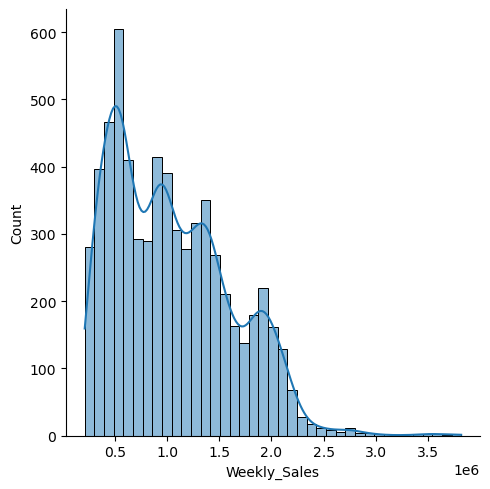

In [134]:
sns.displot(data=walmart_sales['Weekly_Sales'],kde=2)
# Not a perfect bell-shaped curve because the weekly sales are never 0 at walmart

In [135]:
# Converting the 'Date' to datetime format
walmart_sales["Date"]=pd.to_datetime(walmart_sales["Date"], format = "%d-%m-%Y")

In [136]:
# Extracting the time-related features
walmart_sales["Year"]=walmart_sales["Date"].dt.year

In [137]:
walmart_sales["Quarter"]=walmart_sales["Date"].dt.quarter

In [138]:
walmart_sales["Month"]=walmart_sales["Date"].dt.month 

In [139]:
walmart_sales['Week'] = walmart_sales['Date'].dt.isocalendar().week

In [140]:
#walmart_sales["Day"] = walmart_sales["Day"].dt.dayofweek
walmart_sales['Day'] = walmart_sales['Date'].dt.day

In [141]:
walmart_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter,Month,Week,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,1,2,5,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,1,2,6,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,1,2,7,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,1,2,8,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,1,3,9,5


In [142]:
# Converting the categorical features to object type
walmart_sales['Holiday_Flag'] = walmart_sales['Holiday_Flag'].astype('object')
walmart_sales['Store'] = walmart_sales['Store'].astype('object')
walmart_sales['Year'] = walmart_sales['Year'].astype('object')
walmart_sales['Quarter'] = walmart_sales['Quarter'].astype('object')
walmart_sales['Week'] = walmart_sales['Week'].astype('object')

In [143]:
walmart_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   object        
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   object        
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   object        
 9   Quarter       6435 non-null   object        
 10  Month         6435 non-null   int64         
 11  Week          6435 non-null   object        
 12  Day           6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 653.7+ KB


<AxesSubplot:xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

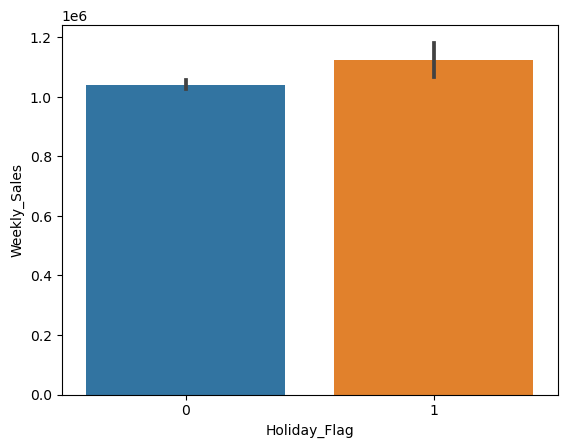

In [144]:
sns.barplot(data=walmart_sales,x='Holiday_Flag',y='Weekly_Sales')

In [145]:
walmart_sales.groupby('Holiday_Flag')['Weekly_Sales'].mean().round()
#We can clearly see that the sales are more in the week if there is any holiday.

Holiday_Flag
0    1041256.0
1    1122888.0
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='Quarter', ylabel='Weekly_Sales'>

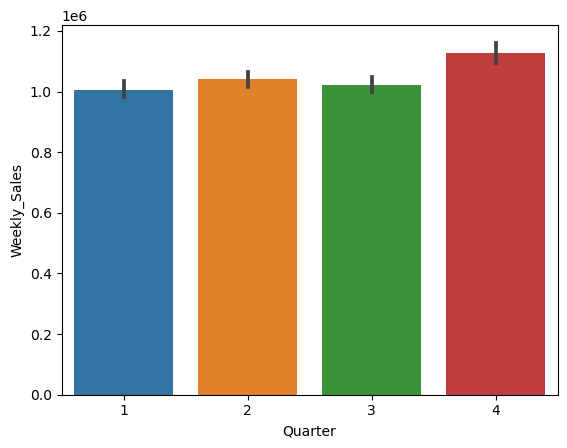

In [146]:
sns.barplot(data=walmart_sales,x='Quarter',y='Weekly_Sales')

In [147]:
walmart_sales.groupby('Quarter')['Weekly_Sales'].mean().round()

Quarter
1    1006136.0
2    1040806.0
3    1023251.0
4    1128774.0
Name: Weekly_Sales, dtype: float64

In [148]:
walmart_sales.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Quarter', 'Month', 'Week',
       'Day'],
      dtype='object')

In [149]:
walmart_sales.corr()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Month,Day
Weekly_Sales,1.000000,-0.063810,0.009464,-0.072634,-0.106176,0.076143,-0.017409
Temperature,-0.063810,1.000000,0.144982,0.176888,0.101158,0.235862,0.026973
Fuel_Price,0.009464,0.144982,1.000000,-0.170642,-0.034684,-0.042156,0.028073
CPI,-0.072634,0.176888,-0.170642,1.000000,-0.302020,0.004980,0.002684
Unemployment,-0.106176,0.101158,-0.034684,-0.302020,1.000000,-0.012746,-0.004233
Month,0.076143,0.235862,-0.042156,0.004980,-0.012746,1.000000,0.015192
Day,-0.017409,0.026973,0.028073,0.002684,-0.004233,0.015192,1.000000


<AxesSubplot:>

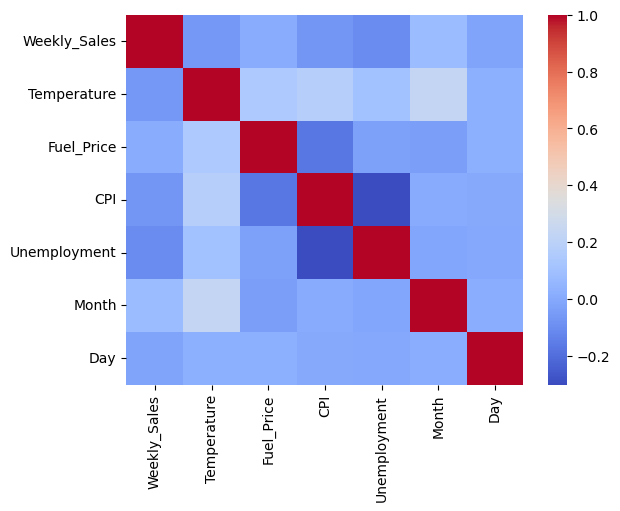

In [150]:
sns.heatmap(walmart_sales.corr(),cmap='coolwarm')

In [151]:
walmart_sales_copy=walmart_sales.copy()

<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

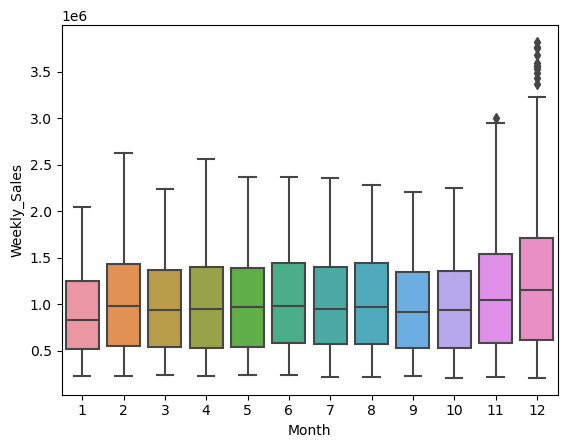

In [152]:
sns.boxplot(x='Month',y='Weekly_Sales',data=walmart_sales)

In [153]:
november_sales = walmart_sales[walmart_sales['Month'] == 11]
november_sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter,Month,Week,Day
39,1,2010-11-05,1551659.28,0,58.74,2.689,211.956394,7.838,2010,4,11,44,5
40,1,2010-11-12,1494479.49,0,59.61,2.728,212.003944,7.838,2010,4,11,45,12
41,1,2010-11-19,1483784.18,0,51.41,2.771,211.889674,7.838,2010,4,11,46,19
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,2010,4,11,47,26
91,1,2011-11-04,1697229.58,0,54.98,3.332,217.837382,7.866,2011,4,11,44,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6334,45,2010-11-26,1182500.16,1,46.15,3.039,182.783277,8.724,2010,4,11,47,26
6383,45,2011-11-04,833429.22,0,43.92,3.551,187.970363,8.523,2011,4,11,44,4
6384,45,2011-11-11,808624.82,0,47.65,3.530,188.063234,8.523,2011,4,11,45,11
6385,45,2011-11-18,773603.77,0,51.34,3.530,188.198365,8.523,2011,4,11,46,18


<AxesSubplot:xlabel='Day', ylabel='Weekly_Sales'>

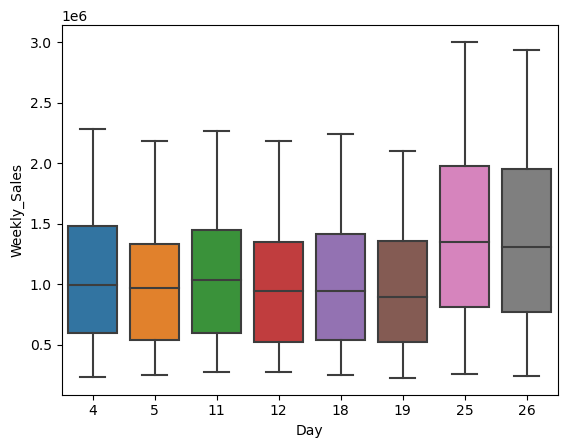

In [154]:
sns.boxplot(x='Day',y='Weekly_Sales',data=november_sales)

In [155]:
#dec_sales = walmart_sales.where(walmart_sales['Month']==12)
december_sales = walmart_sales[walmart_sales['Month'] == 12]
december_sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter,Month,Week,Day
43,1,2010-12-03,1548033.78,0,49.27,2.708,211.607193,7.838,2010,4,12,48,3
44,1,2010-12-10,1682614.26,0,46.33,2.843,211.465953,7.838,2010,4,12,49,10
45,1,2010-12-17,1891034.93,0,49.84,2.869,211.405312,7.838,2010,4,12,50,17
46,1,2010-12-24,2387950.20,0,52.33,2.886,211.405122,7.838,2010,4,12,51,24
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,2010,4,12,52,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,45,2011-12-02,875699.81,0,50.19,3.452,188.502435,8.523,2011,4,12,48,2
6388,45,2011-12-09,957155.31,0,46.57,3.415,188.654469,8.523,2011,4,12,49,9
6389,45,2011-12-16,1078905.68,0,39.93,3.413,188.797935,8.523,2011,4,12,50,16
6390,45,2011-12-23,1521957.99,0,42.27,3.389,188.929975,8.523,2011,4,12,51,23


<AxesSubplot:xlabel='Day', ylabel='Weekly_Sales'>

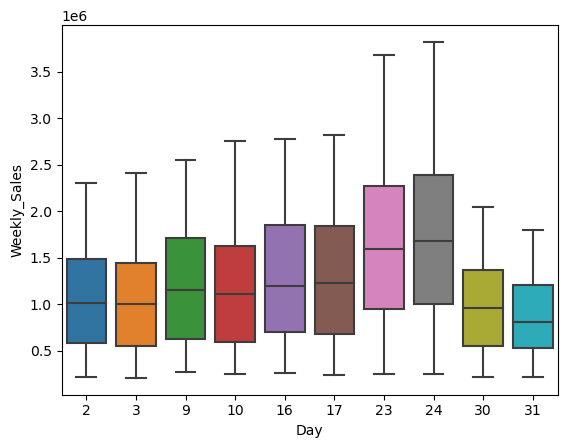

In [156]:
sns.boxplot(x='Day',y='Weekly_Sales',data=december_sales)

<AxesSubplot:xlabel='Month', ylabel='Temperature'>

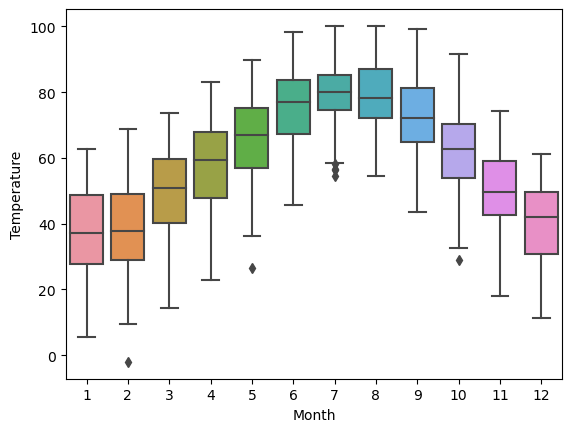

In [157]:
sns.boxplot(x='Month',y='Temperature',data=walmart_sales_copy)

<AxesSubplot:xlabel='Month', ylabel='Unemployment'>

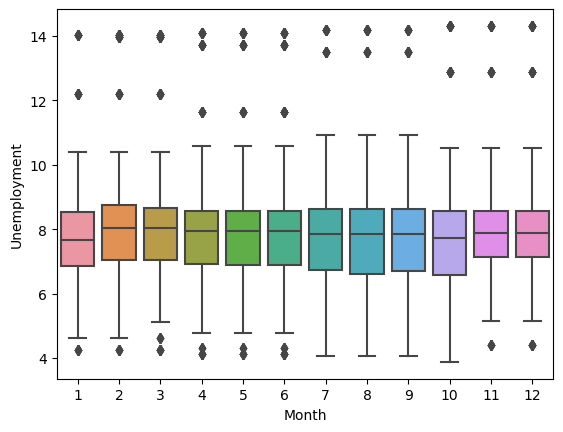

In [158]:
sns.boxplot(x='Month',y='Unemployment',data=walmart_sales_copy)

In [193]:
Q1 = walmart_sales['Weekly_Sales'].quantile(0.25)
Q3 = walmart_sales['Weekly_Sales'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
walmart_sales_no = walmart_sales[(walmart_sales['Weekly_Sales'] >= lower_bound) & (walmart_sales['Weekly_Sales'] <= upper_bound)]

print(walmart_sales_no_outliers)

     Store       Date  Weekly_Sales Holiday_Flag  Temperature  Fuel_Price  \
0        1 2010-02-05    1643690.90            0        42.31       2.572   
1        1 2010-02-12    1641957.44            1        38.51       2.548   
2        1 2010-02-19    1611968.17            0        39.93       2.514   
3        1 2010-02-26    1409727.59            0        46.63       2.561   
4        1 2010-03-05    1554806.68            0        46.50       2.625   
...    ...        ...           ...          ...          ...         ...   
6430    45 2012-09-28     713173.95            0        64.88       3.997   
6431    45 2012-10-05     733455.07            0        64.89       3.985   
6432    45 2012-10-12     734464.36            0        54.47       4.000   
6433    45 2012-10-19     718125.53            0        56.47       3.969   
6434    45 2012-10-26     760281.43            0        58.85       3.882   

             CPI  Unemployment  Year Quarter  Month Week  Day  
0     211.0

In [194]:
# Dropping the outliners
walmart_sales_copy.drop(walmart_sales_copy[walmart_sales_copy['Temperature'] < 7].index, axis = 0, inplace = True)
walmart_sales_copy.drop(walmart_sales_copy[walmart_sales_copy['Unemployment'] < 4].index, axis = 0, inplace = True)
walmart_sales_copy.drop(walmart_sales_copy[walmart_sales_copy['Unemployment'] > 10.9].index, axis = 0, inplace = True)


In [195]:
walmart_sales_copy.shape

(6011, 13)

In [162]:
x=walmart_sales_copy[['Store','Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment','Year','Quarter','Month','Week']]

In [163]:
x.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter,Month,Week
0,1,0,42.31,2.572,211.096358,8.106,2010,1,2,5
1,1,1,38.51,2.548,211.242170,8.106,2010,1,2,6
2,1,0,39.93,2.514,211.289143,8.106,2010,1,2,7
3,1,0,46.63,2.561,211.319643,8.106,2010,1,2,8
4,1,0,46.50,2.625,211.350143,8.106,2010,1,3,9


In [164]:
y=walmart_sales_copy['Weekly_Sales']

In [165]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.18, random_state=42)

In [166]:
# Define a preprocessor using ColumnTransformer and Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [167]:
preprocessor = ColumnTransformer([
    ('num_features', StandardScaler(), x.select_dtypes('number').columns.tolist()),
    ('cat_features', OneHotEncoder(), x.select_dtypes('object').columns.tolist())
])

# Random Forest Regression

In [168]:

from sklearn.ensemble import RandomForestRegressor

In [169]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor()

In [170]:
# Create a pipeline to chain preprocessor and model
from sklearn.pipeline import Pipeline

In [171]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

In [172]:
# Train the model using the pipeline
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_features',
                                                  StandardScaler(),
                                                  ['Temperature', 'Fuel_Price',
                                                   'CPI', 'Unemployment',
                                                   'Month']),
                                                 ('cat_features',
                                                  OneHotEncoder(),
                                                  ['Store', 'Holiday_Flag',
                                                   'Year', 'Quarter',
                                                   'Week'])])),
                ('model', RandomForestRegressor())])

In [173]:
# Making predictions on the test set
predictions = pipeline.predict(x_test)

In [174]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

In [175]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared/Accuracy: {r2}')

Root Mean Squared Error: 92690.95845313506
R-squared/Accuracy: 0.9745940151118069


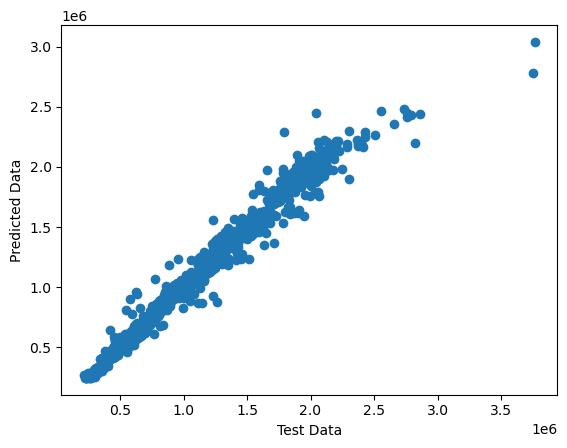

In [176]:
# Actual Sales vs Predicted sales
plt.scatter(x=y_test,y=predictions)
plt.xlabel('Test Data')
plt.ylabel('Predicted Data')
plt.show()

In [177]:
walmart_sales.sample()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Quarter,Month,Week,Day
679,5,2012-02-24,312220.47,0,57.75,3.555,221.222424,5.943,2012,1,2,8,24


In [178]:

from sklearn.impute import SimpleImputer

# Example future date data as a single list
future_data_list = [28, 0, 50.74, 3.342, 127.580032, 14.021, 2011, 1, 1, 4]

# Defining the order of features which should match the order used during training)
feature_order = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Quarter','Month','Week']

# Create a dictionary with feature names as keys and values from the list
future_data_dict = dict(zip(feature_order, future_data_list))

# Convert the dictionary to a DataFrame
future_data = pd.DataFrame([future_data_dict])

In [179]:

# Ensure correct data types

future_data['Store'] = future_data['Store'].astype('object')
future_data['Holiday_Flag'] = future_data['Holiday_Flag'].astype('object')
future_data['Year'] = future_data['Year'].astype('object')
future_data['Quarter'] = future_data['Quarter'].astype('object')
future_data['Week'] = future_data['Week'].astype('object')


In [180]:
# Handle NaN values using SimpleImputer
numeric_features = future_data.select_dtypes(include=['float64']).columns
categorical_features = future_data.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')) 
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing'))
])



In [181]:
# Preprocess the future date data
future_data_preprocessed = preprocessor.transform(future_data)


In [182]:

# Make predictions using the trained model
future_predictions = pipeline.named_steps['model'].predict(future_data_preprocessed)

# Print the predicted weekly sales for the future date
print(f'Predicted Weekly Sales for the Future Date using Random Forest Regressor: {future_predictions[0]}')

Predicted Weekly Sales for the Future Date using Random Forest Regressor: 981463.5011000001


# Linear Regression

In [183]:
from sklearn.linear_model import LinearRegression 
lm = LinearRegression() #instantiate 


In [184]:
lm.fit(x_train,y_train)

LinearRegression()

In [185]:
pipeline_linear = Pipeline([
    ('preprocessor', preprocessor),
    ('model', lm)
])

In [186]:
pipeline_linear.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_features',
                                                  StandardScaler(),
                                                  ['Temperature', 'Fuel_Price',
                                                   'CPI', 'Unemployment',
                                                   'Month']),
                                                 ('cat_features',
                                                  OneHotEncoder(),
                                                  ['Store', 'Holiday_Flag',
                                                   'Year', 'Quarter',
                                                   'Week'])])),
                ('model', LinearRegression())])

In [187]:
predicts = pipeline_linear.predict(x_test)

Text(0, 0.5, 'Predicted Data')

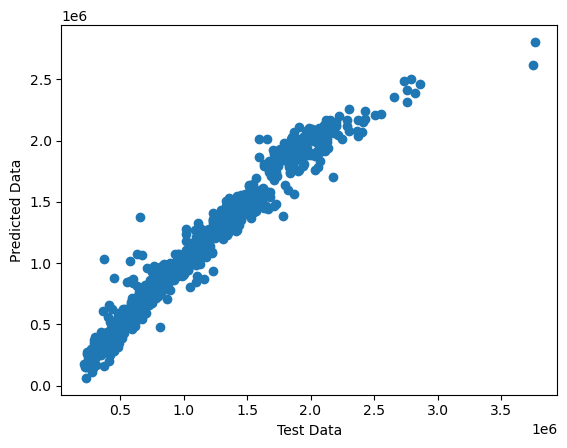

In [188]:
plt.scatter(x=y_test,y=predicts)
plt.xlabel('Test Data')
plt.ylabel('Predicted Data')

In [189]:
mse = mean_squared_error(y_test, predicts)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicts)
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared/Accuracy: {r2}')

Root Mean Squared Error: 110857.14862401542
R-squared/Accuracy: 0.9636596841815758


In [190]:

# Make predictions using the trained model
future_predictions = pipeline_linear.named_steps['model'].predict(future_data_preprocessed)

# Print the predicted weekly sales for the future date
print(f'Predicted Weekly Sales for the Future Date using Linear Regression: {future_predictions[0]}')

Predicted Weekly Sales for the Future Date using Linear Regression: 995060.5829586859


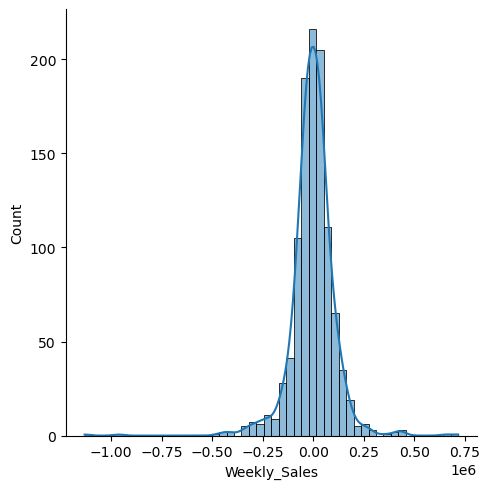

In [191]:
sns.displot((predicts-y_test),bins=50,kde=True)

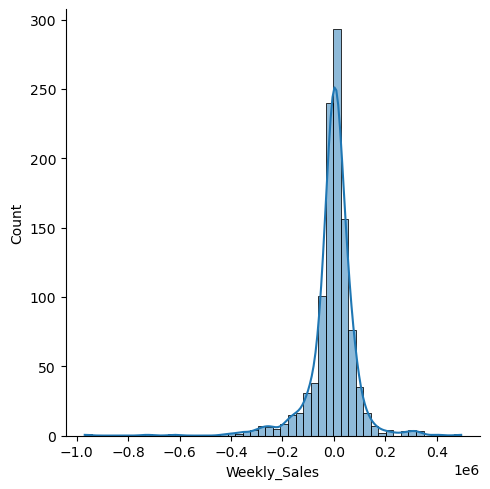

In [192]:
sns.displot((predictions-y_test),bins=50,kde=True)